# **Génération, analyse et classification de trajectoires d'objets**

 Dans le cadre de notre projet S9 à l'ENSEIRB, nous(groupe de 5) allons travailler sur la classification de trajectoires.
- **Description du projet**: 


## **1. Génération de trajectoires synthétiques**

### **1.1 Cas des MRU dans le plan:**

- **Obtension des paramètres de la représentation d'état**



### **1.1.1 Modèle Continu**

Dans ce modèle, l'état est défini par les positions et les vitesses dans le plan. Le vecteur d'état est donc :

$$
x(t) = \begin{bmatrix} x(t) \\ \frac{dx(t)}{dt} \\ y(t) \\ \frac{dy(t)}{dt} \end{bmatrix}
$$

L'équation de mouvement pour le système dans le plan est donnée par :

$$
\frac{dx(t)}{dt} = A \cdot x(t) + B \cdot w(t)
$$

où :
- `x(t)` est le vecteur d'état : $\begin{bmatrix} x(t) & \frac{dx(t)}{dt} & y(t) & \frac{dy(t)}{dt} \end{bmatrix}$,
- `A` est la matrice de transition continue, et
- `B` est la matrice d'entrée du bruit.

La matrice de transition continue `A` est :

$$
A = \begin{bmatrix} 
0 & 1 & 0 & 0 \\ 
0 & 0 & 0 & 0 \\ 
0 & 0 & 0 & 1 \\ 
0 & 0 & 0 & 0 
\end{bmatrix}
$$

La matrice d'entrée `B` pour le bruit `w(t)` est :

$$
B = \begin{bmatrix} 
0 & 0 \\ 
1 & 0 \\ 
0 & 0 \\ 
0 & 1 
\end{bmatrix}
$$

où le bruit `w(t)` est un vecteur gaussien de dimension 2 avec une variance `q = ngT`.

### **1.1.2. Solution de l'Équation de l'État**

Nous résolvons l'équation différentielle en utilisant la solution générale pour un système linéaire :

$$
x(t) = e^{A(t - t_0)} x(t_0) + \int_{t_0}^{t} e^{A(t - \tau)} B w(\tau) \, d\tau
$$

### **1.1.3. Discrétisation**

Pour passer à un modèle discret, nous prenons `t = (k+1)*T` et `t0 = k*T`, où `T` est la période d'échantillonnage. L'équation devient alors :
$$
x((k+1)T) = e^{A T} x(kT) + \int_{kT}^{(k+1)T} e^{A((k+1)T - \tau)} B w(\tau) \, d\tau
$$

#### **1.1.3.1 Matrice de Transition Discrète `Phi(k)`**

La matrice de transition discrète `Phi(k)` est définie comme :

$$
\Phi(k) = e^{AT}
$$

Pour calculer l'exponentielle de la matrice `A`, nous utilisons son développement en série de Taylor. Nous obtenons l'exponentielle matricielle suivante à l'ordre 1 :

$$
e^{A T} = \begin{bmatrix} 
1 & T & 0 & 0 \\ 
0 & 1 & 0 & 0 \\ 
0 & 0 & 1 & T \\ 
0 & 0 & 0 & 1 
\end{bmatrix}
$$


#### **1.1.3.2 Modèle du Bruit**

Pour la contribution du bruit, nous devons calculer l'intégrale suivante :

$$
u(k) = \int_{kT}^{(k+1)T} e^{A((k+1)T - \tau)} B w(\tau) \, d\tau
$$
Nous obtenons, après intégration, la contribution du bruit dans les deux dimensions :

$$
u(k) = \begin{bmatrix} 
\frac{T^2}{2} & 0 \\ 
T & 0 \\ 
0 & \frac{T^2}{2} \\ 
0 & T 
\end{bmatrix} w(kT)
$$

#### **1.1.3.3 Covariance du Bruit**

La covariance du bruit `Q` est donnée par la matrice `E[u(k) * u(k)^T]`. En utilisant l'expression de `u(k)`, nous obtenons la matrice de covariance :

$$
Q = q \begin{bmatrix} 
\frac{T^3}{3} & \frac{T^2}{2} & 0 & 0 \\ 
\frac{T^2}{2} & T & 0 & 0 \\ 
0 & 0 & \frac{T^3}{3} & \frac{T^2}{2} \\ 
0 & 0 & \frac{T^2}{2} & T 
\end{bmatrix}
$$

Cette matrice `Q` décrit la covariance du bruit ajouté à chaque pas de temps.
### **1.1.4. Modèle Discret Final**

Le modèle discret final s'écrit :
$$
x((k+1)T) = \Phi(k) \cdot x(kT) + u(k)
$$

où :
$$\Phi(k) = \begin{bmatrix}
1 & T & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & T \\
0 & 0 & 0 & 1
\end{bmatrix}
$$

$$ u(k) = \begin{bmatrix}
\frac{T^2}{2} & 0 \\
T & 0 \\
0 & \frac{T^2}{2} \\
0 & T
\end{bmatrix} w(kT)$$
- et la covariance du bruit est :
$$Q = q \begin{bmatrix}
\frac{T^3}{3} & \frac{T^2}{2} & 0 & 0 \\
\frac{T^2}{2} & T & 0 & 0 \\
0 & 0 & \frac{T^3}{3} & \frac{T^2}{2} \\
0 & 0 & \frac{T^2}{2} & T
\end{bmatrix} $$

### **Librairies utilies**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys 


### **Code pour générer une seule trajectoire**

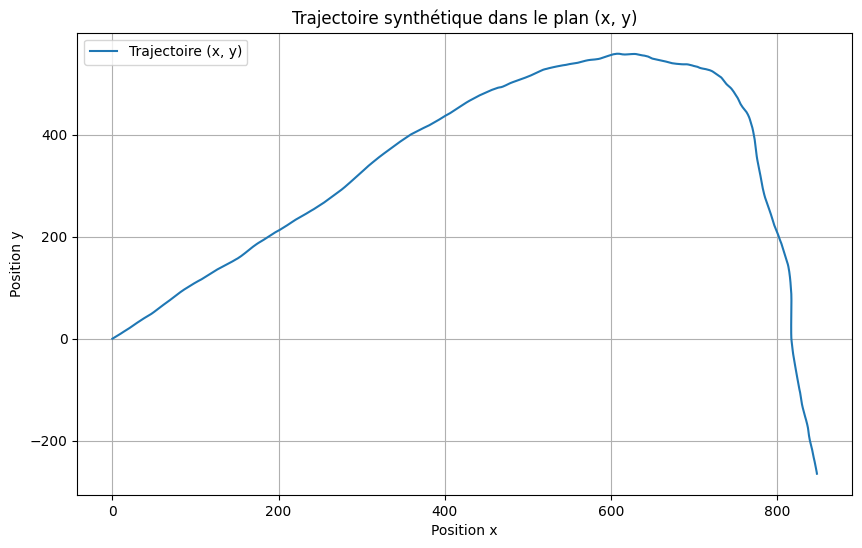

In [2]:
T = 1.0  
q = 0.1  
N = 1028  

Phi = np.array([[1, T, 0, 0],   
                [0, 1, 0, 0],
                [0, 0, 1, T],
                [0, 0, 0, 1]])
B = np.array([[T**2 / 2, 0],   #
              [T, 0],
              [0, T**2 / 2],
              [0, T]])


Q = q * np.array([[T**3 / 3, T**2 / 2, 0, 0],  
                  [T**2 / 2, T, 0, 0],
                  [0, 0, T**3 / 3, T**2 / 2],
                  [0, 0, T**2 / 2, T]])


x = np.zeros((4, N))  
x[:, 0] = np.array([0, 1, 0, 1])  

# Génération des trajectoires
for k in range(1, N):
    w_k = np.random.multivariate_normal(mean=[0, 0, 0, 0], cov=Q) # accélération 
    R = np.linalg.cholesky(Q)
    u_k = R @ w_k
    x[:, k] = Phi @ x[:, k-1] + B @ u_k[:2]  
    


plt.figure(figsize=(10, 6))
plt.plot(x[0, :], x[2, :], label='Trajectoire (x, y)') 
plt.title('Trajectoire synthétique dans le plan (x, y)')
plt.xlabel('Position x')
plt.ylabel('Position y')
plt.legend()
plt.grid(True)
plt.show()

## **Génération des mouvements curvilignes dans le plan**

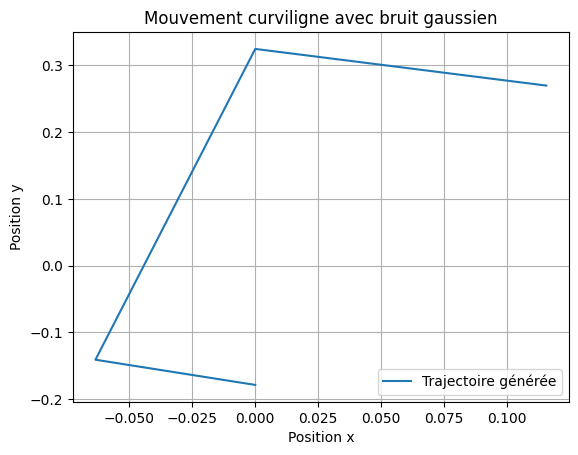

In [5]:
# Hyperparamètres
Nc = 1028
T = 1.0
g = 9.8
n = 2
q_c = n*g*T


x_k = np.array([0, 10, 0, 10])  

Phi_c = np.array([[1, T, 0, 0],   
                [0, 1, 0, 0],
                [0, 0, 1, T],
                [0, 0, 0, 1]])



def compute_Gmatrix(v_x,v_y):
    norm = np.sqrt(v_x**2 + v_y**2)
    return np.array([[0, 0],
                     [v_x/norm, -v_y/norm],
                     [0, 0],
                     [v_y/norm, v_x/norm]])


Q_c = q_c * np.array([[T**3 / 3, T**2 / 2, 0, 0],  
                  [T**2 / 2, T, 0, 0],
                  [0, 0, T**3 / 3, T**2 / 2],
                  [0, 0, T**2 / 2, T]])


L = np.linalg.cholesky(Q)

# Génération d'une trajectoire :

x = np.zeros((4, N))  
x[:, 0] = np.array([0, 1, 0, 1])
for k in range(Nc):
    w_k = np.random.multivariate_normal(mean=[0, 0, 0, 0], cov=Q)
    a_k = L @ w_k
    v_x, v_y = x_k[1], x_k[3]
    G = compute_Gmatrix(v_x,v_y)
    x[:, k] = Phi_c @ x[:, k-1] + G @ a_k[:2]  

plt.plot(x[:, 0], x[:, 2], label="Trajectoire générée")
plt.title("Mouvement curviligne avec bruit gaussien")
plt.xlabel("Position x")
plt.ylabel("Position y")
plt.legend()
plt.grid(True)
plt.show()









